# 実習10

#### GANを体験する

#### 参考
https://elix-tech.github.io/ja/2017/02/06/gan.html
https://qiita.com/God_KonaBanana/items/293d49e3c34601a1810b

In [1]:
# generatorを作成

from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D, Convolution2D

def generator_model():
    model = Sequential()
    model.add(Dense(input_dim=100, output_dim=1024))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(128*7*7))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Reshape((7, 7, 128), input_shape=(128*7*7,)))
    model.add(UpSampling2D((2, 2)))
    model.add(Convolution2D(64, (5,5), border_mode='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(UpSampling2D((2, 2)))
    model.add(Convolution2D(1, (5,5), border_mode='same'))
    model.add(Activation('tanh'))
    return model

Using TensorFlow backend.


In [2]:
# generator_modelが(28, 28, 1)の画像を出力していることを確認
model = generator_model()
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, units=1024)`
  if __name__ == '__main__':


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), padding="same")`






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              103424    
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6272)              6428800   
_________________________________________________________________
batch_normalization_2 (Batch (None, 6272)              25088     
_________________________________________________________________
activation_2 (Activation)    (None, 6272)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (5, 5), padding="same")`


In [0]:
# discriminatorを作成

from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Flatten, Dropout

def discriminator_model():
    model = Sequential()
    model.add(Convolution2D(64, 5, 5,
                            subsample=(2, 2),
                            border_mode='same',
                            input_shape=(28, 28, 1)))
    model.add(LeakyReLU(0.2))
    model.add(Convolution2D(128, 5, 5, subsample=(2, 2)))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

In [4]:
# discriminator_modelの中身、最後はsigmoidで確率を出力
model = discriminator_model()
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 128)         204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               819456    
_____

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), input_shape=(28, 28, 1..., strides=(2, 2), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), strides=(2, 2))`
  if sys.path[0] == '':


11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28, 1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), input_shape=(28, 28, 1..., strides=(2, 2), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), strides=(2, 2))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, units=1024)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (5, 5), padding="same")`


Number of batches: 1875


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'




epoch: 0, batch: 0, g_loss: 0.714431, d_loss: 0.698817
epoch: 0, batch: 1, g_loss: 0.694319, d_loss: 0.692081
epoch: 0, batch: 2, g_loss: 0.692907, d_loss: 0.680940
epoch: 0, batch: 3, g_loss: 0.698166, d_loss: 0.684879
epoch: 0, batch: 4, g_loss: 0.676883, d_loss: 0.687947


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoch: 0, batch: 5, g_loss: 0.663440, d_loss: 0.681818
epoch: 0, batch: 6, g_loss: 0.661517, d_loss: 0.682515
epoch: 0, batch: 7, g_loss: 0.670330, d_loss: 0.684192
epoch: 0, batch: 8, g_loss: 0.661027, d_loss: 0.674116
epoch: 0, batch: 9, g_loss: 0.646718, d_loss: 0.679601
epoch: 0, batch: 10, g_loss: 0.633626, d_loss: 0.679809
epoch: 0, batch: 11, g_loss: 0.621170, d_loss: 0.669448
epoch: 0, batch: 12, g_loss: 0.615843, d_loss: 0.677758
epoch: 0, batch: 13, g_loss: 0.619286, d_loss: 0.680841
epoch: 0, batch: 14, g_loss: 0.612036, d_loss: 0.671585
epoch: 0, batch: 15, g_loss: 0.602597, d_loss: 0.678997
epoch: 0, batch: 16, g_loss: 0.596683, d_loss: 0.680082
epoch: 0, batch: 17, g_loss: 0.601406, d_loss: 0.684690
epoch: 0, batch: 18, g_loss: 0.582843, d_loss: 0.695532
epoch: 0, batch: 19, g_loss: 0.589054, d_loss: 0.693008
epoch: 0, batch: 20, g_loss: 0.600087, d_loss: 0.697976
epoch: 0, batch: 21, g_loss: 0.592668, d_loss: 0.687805
epoch: 0, batch: 22, g_loss: 0.581909, d_loss: 0.6917

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


epoch: 5, batch: 0, g_loss: 0.666495, d_loss: 0.700923
epoch: 5, batch: 1, g_loss: 0.677400, d_loss: 0.697864
epoch: 5, batch: 2, g_loss: 0.683070, d_loss: 0.695146
epoch: 5, batch: 3, g_loss: 0.694326, d_loss: 0.691447
epoch: 5, batch: 4, g_loss: 0.670655, d_loss: 0.687145
epoch: 5, batch: 5, g_loss: 0.686484, d_loss: 0.690629
epoch: 5, batch: 6, g_loss: 0.686488, d_loss: 0.691403
epoch: 5, batch: 7, g_loss: 0.691178, d_loss: 0.696165
epoch: 5, batch: 8, g_loss: 0.686796, d_loss: 0.700772
epoch: 5, batch: 9, g_loss: 0.679323, d_loss: 0.686545
epoch: 5, batch: 10, g_loss: 0.686004, d_loss: 0.685884
epoch: 5, batch: 11, g_loss: 0.681641, d_loss: 0.687761
epoch: 5, batch: 12, g_loss: 0.678534, d_loss: 0.682199
epoch: 5, batch: 13, g_loss: 0.677195, d_loss: 0.693333
epoch: 5, batch: 14, g_loss: 0.671010, d_loss: 0.685470
epoch: 5, batch: 15, g_loss: 0.676582, d_loss: 0.694247
epoch: 5, batch: 16, g_loss: 0.676208, d_loss: 0.692992
epoch: 5, batch: 17, g_loss: 0.695149, d_loss: 0.691565
ep

NameError: ignored

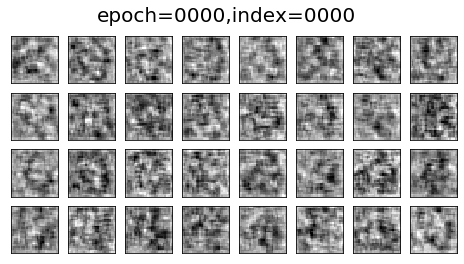

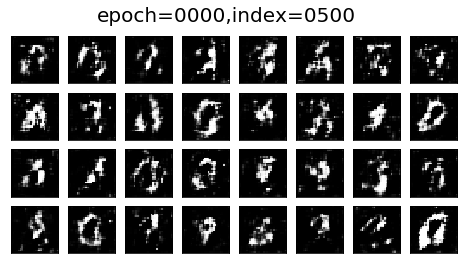

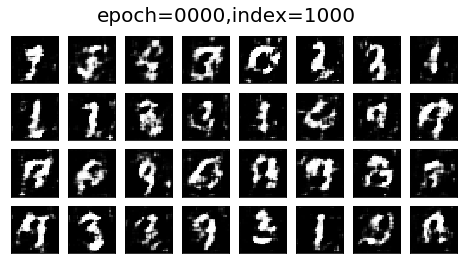

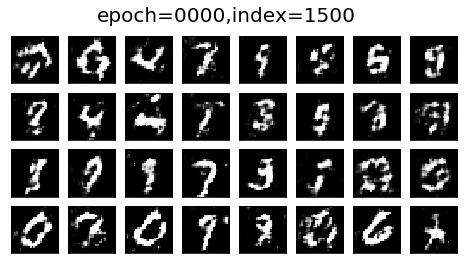

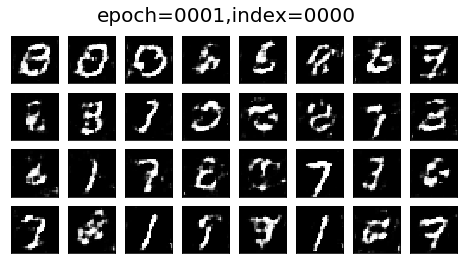

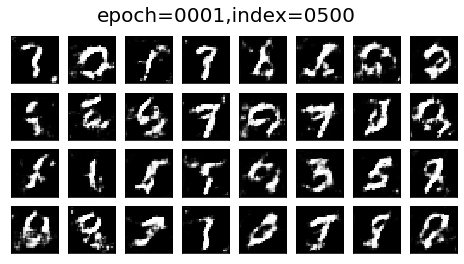

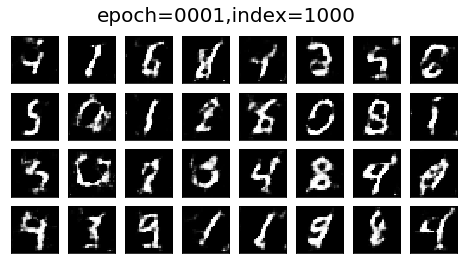

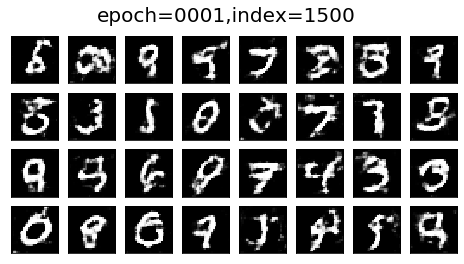

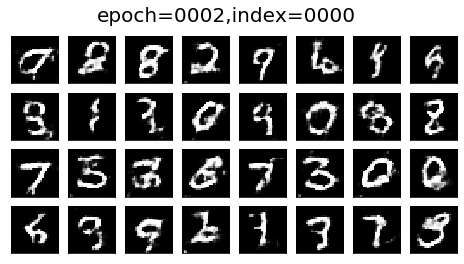

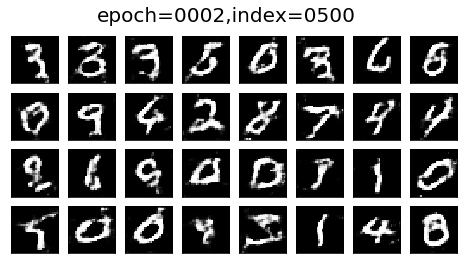

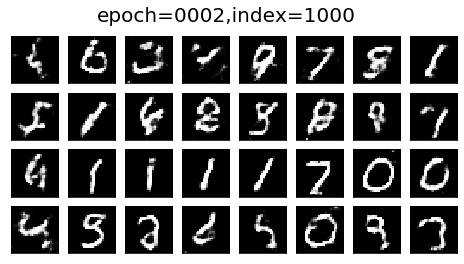

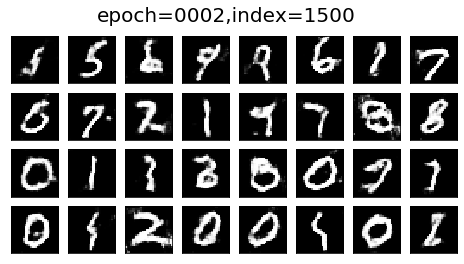

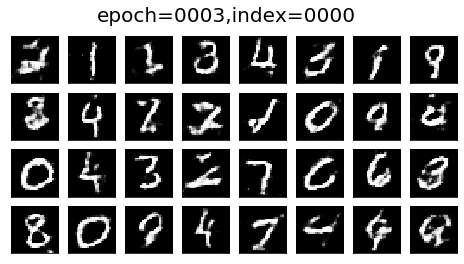

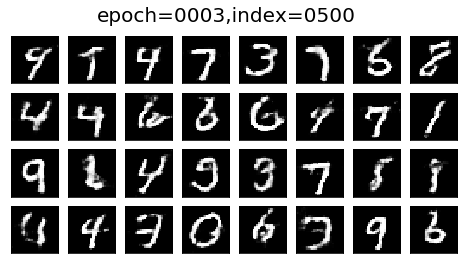

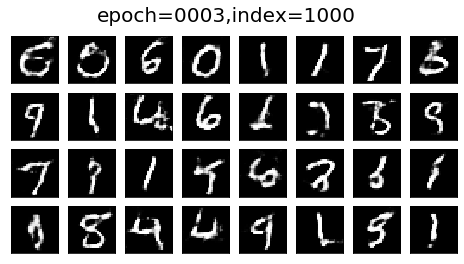

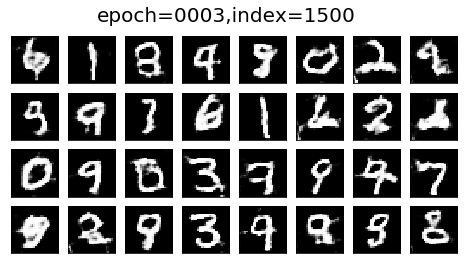

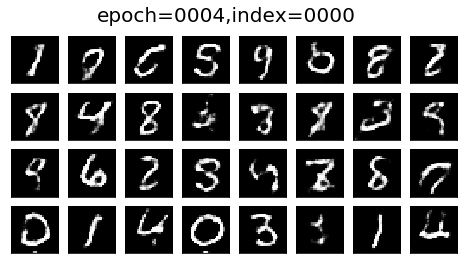

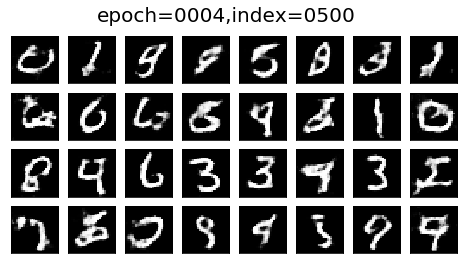

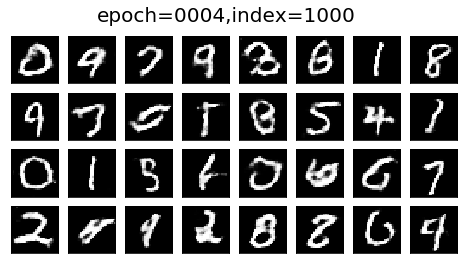

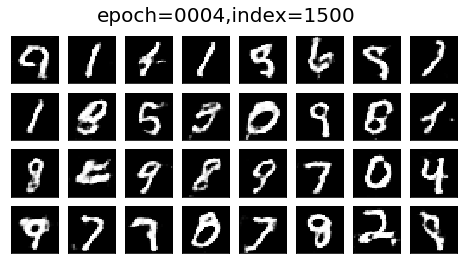

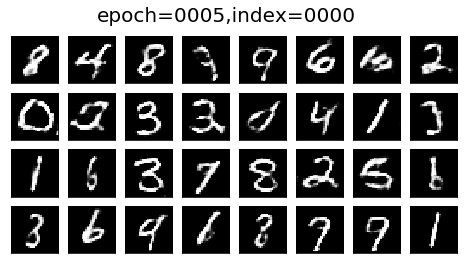

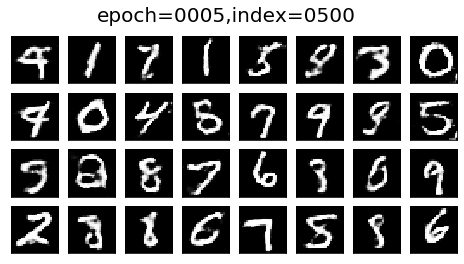

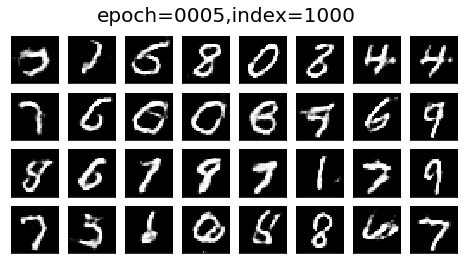

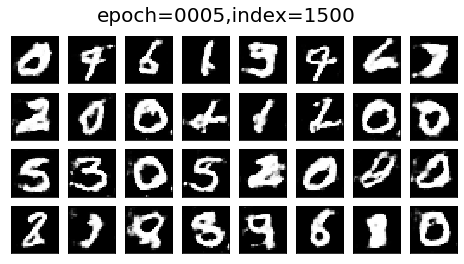

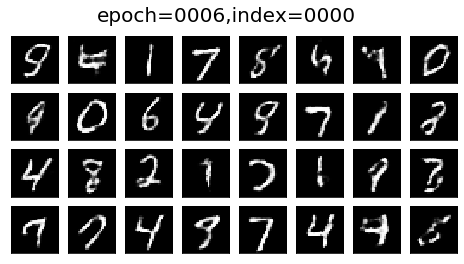

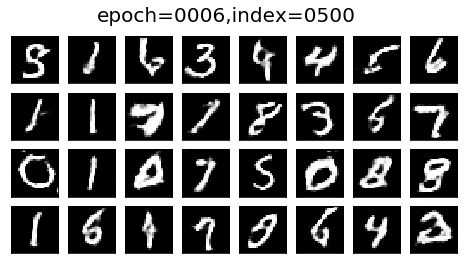

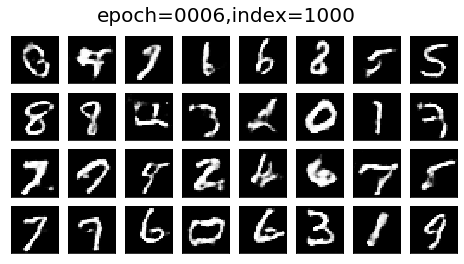

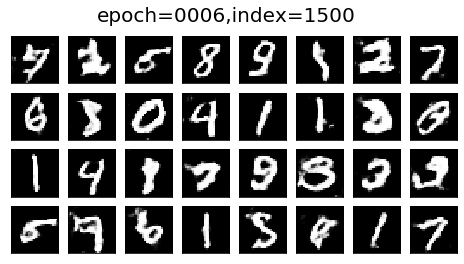

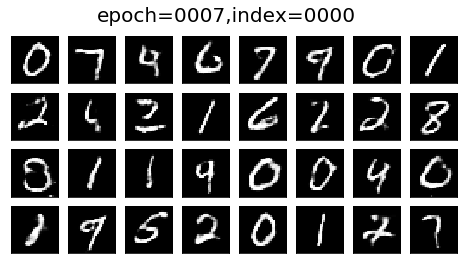

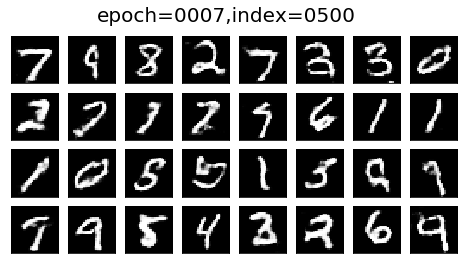

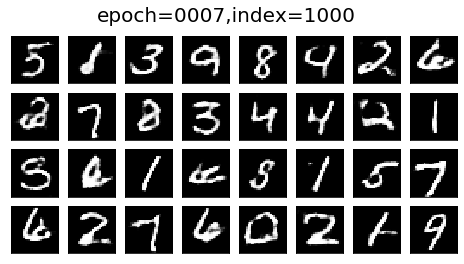

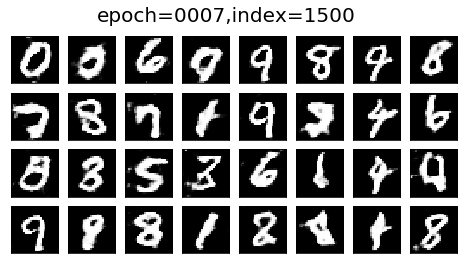

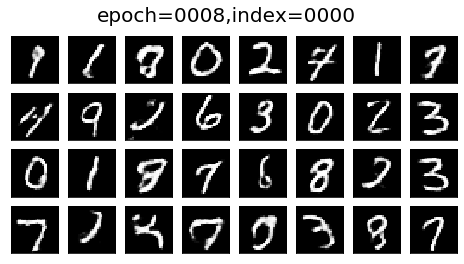

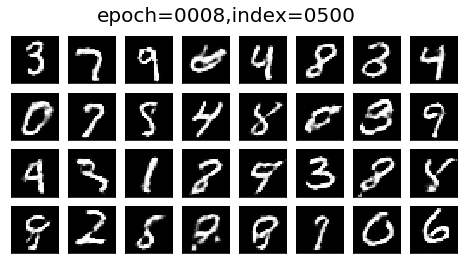

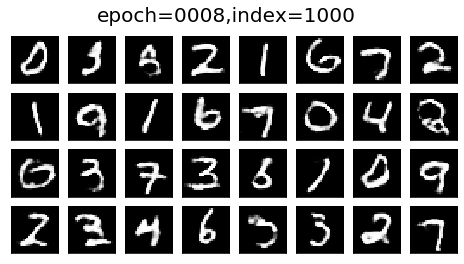

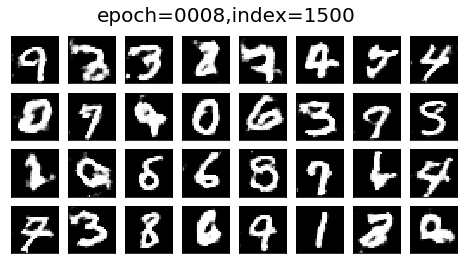

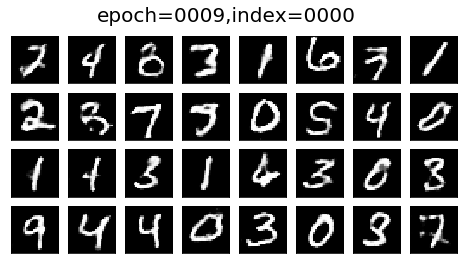

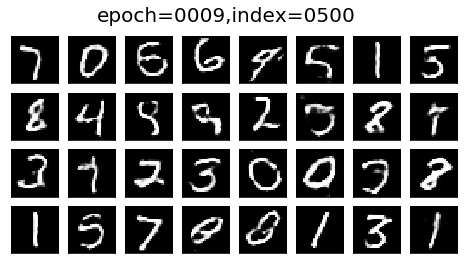

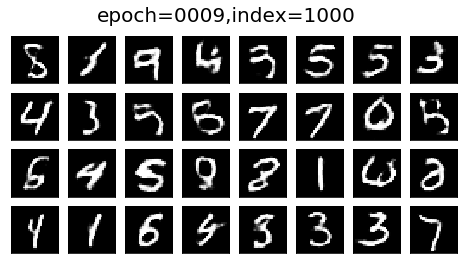

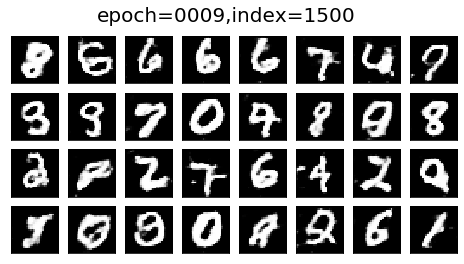

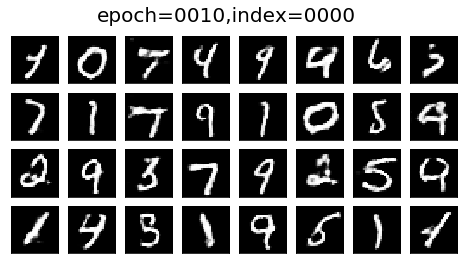

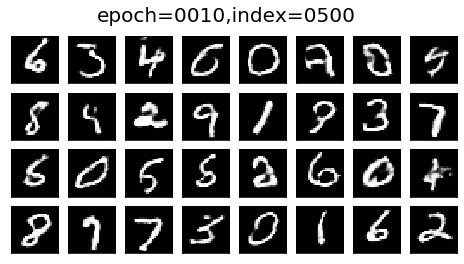

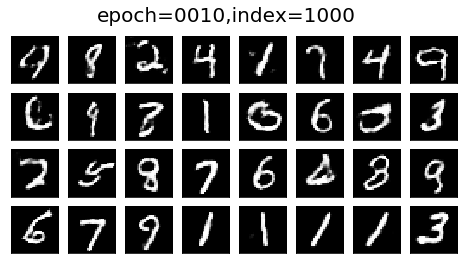

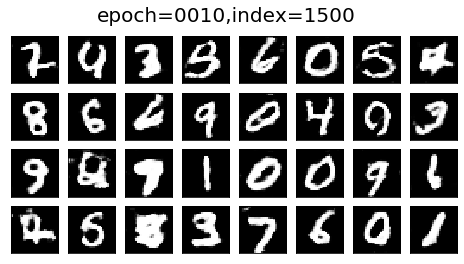

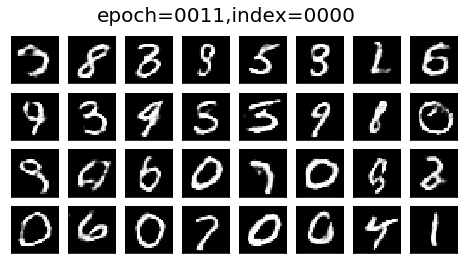

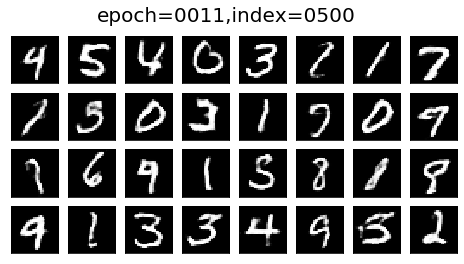

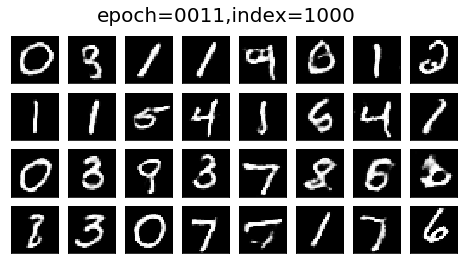

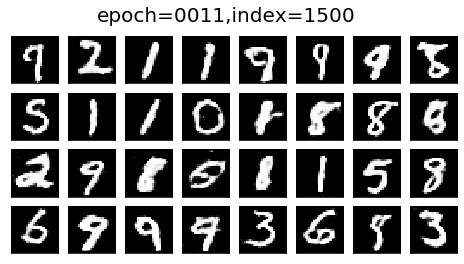

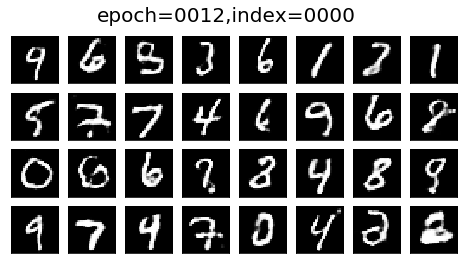

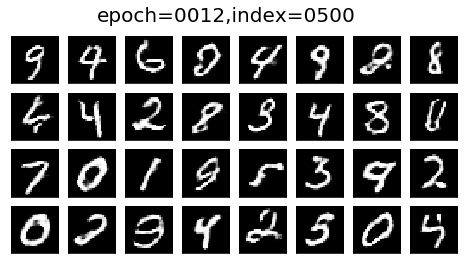

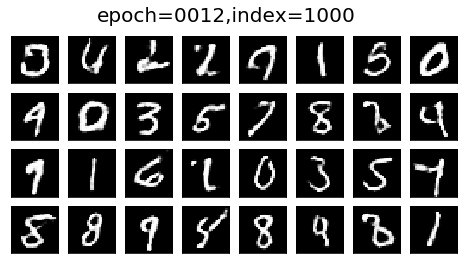

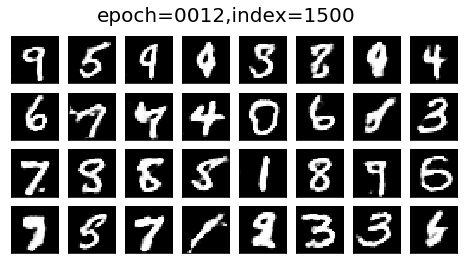

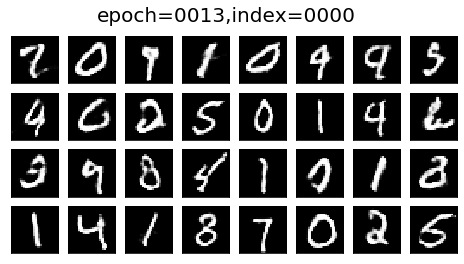

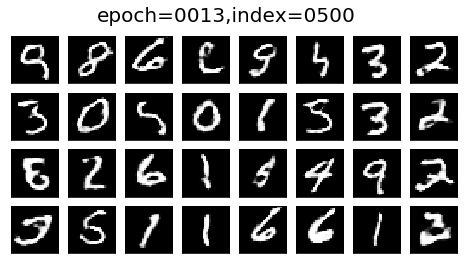

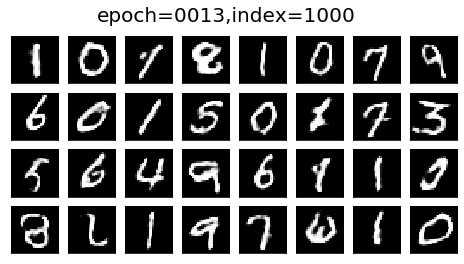

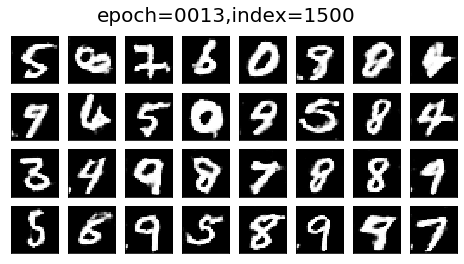

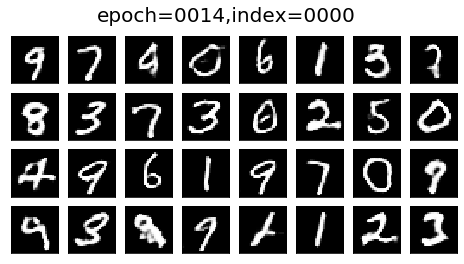

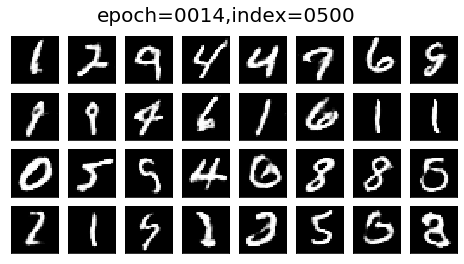

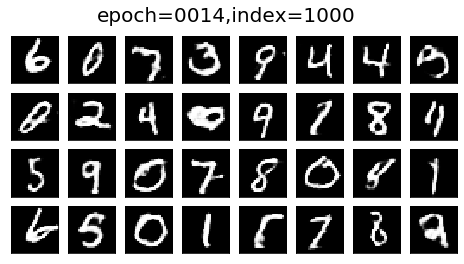

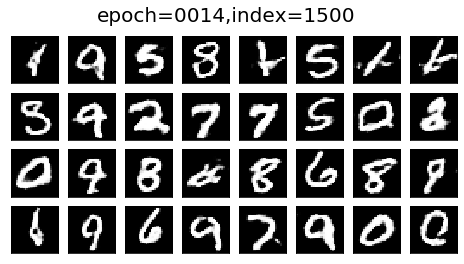

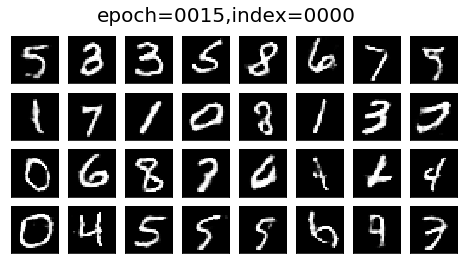

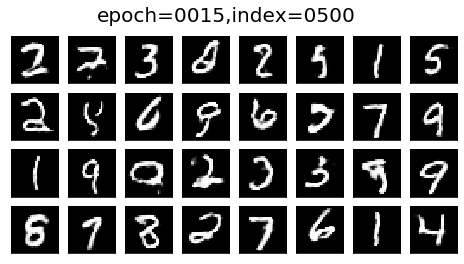

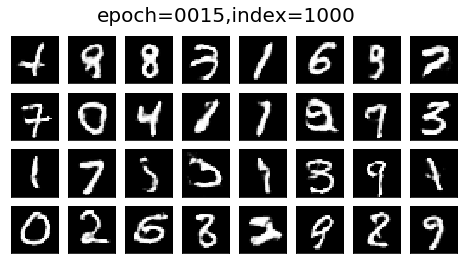

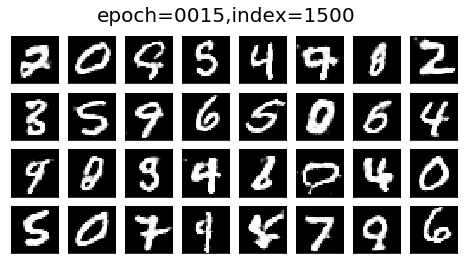

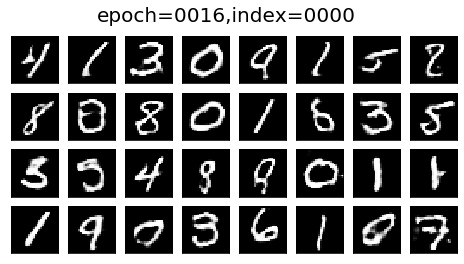

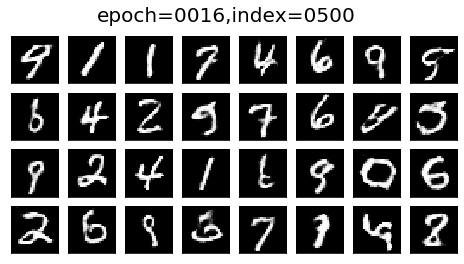

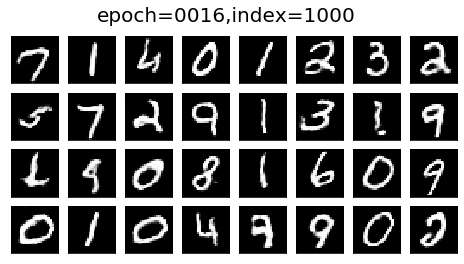

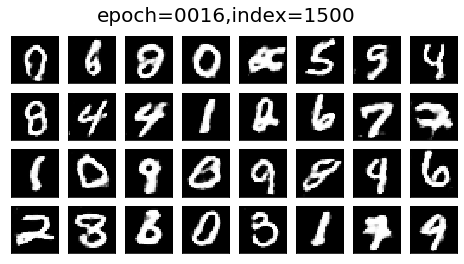

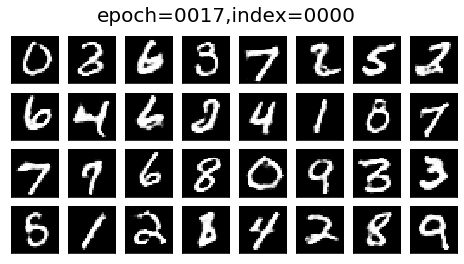

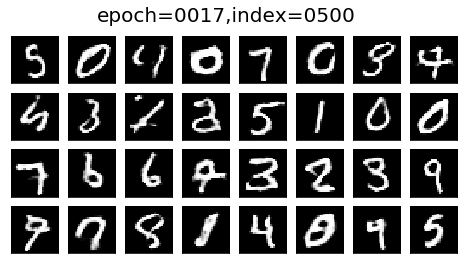

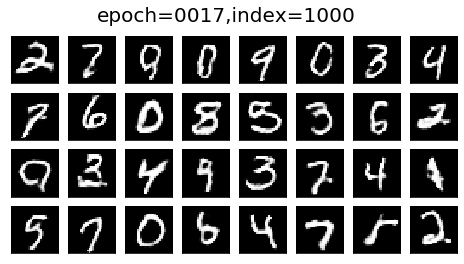

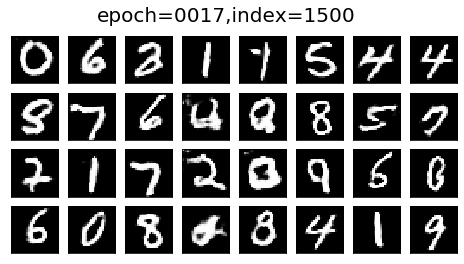

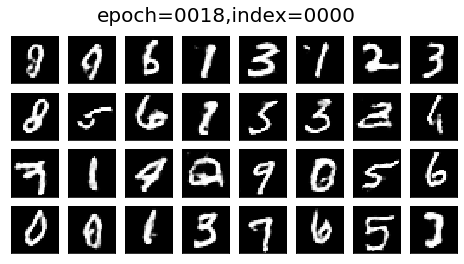

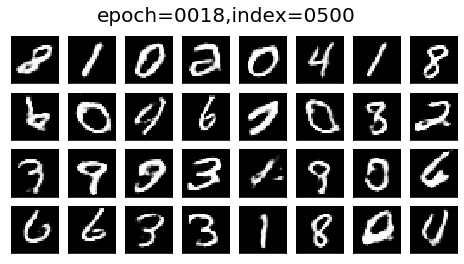

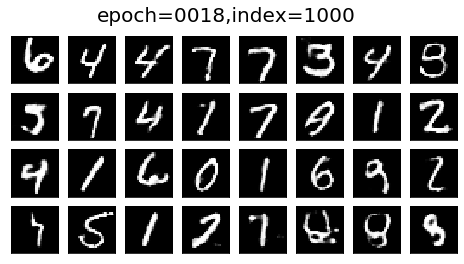

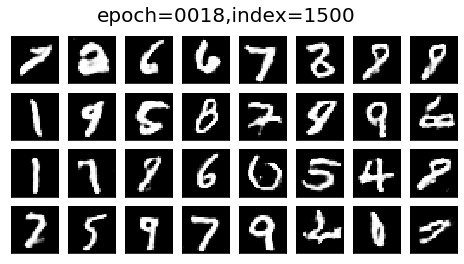

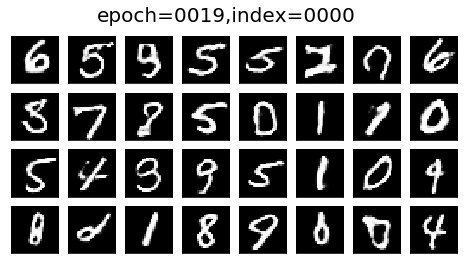

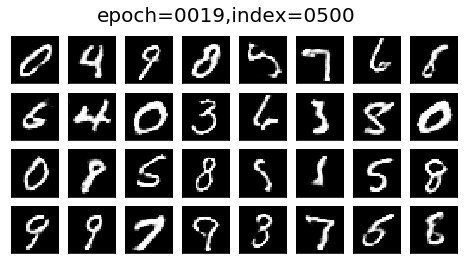

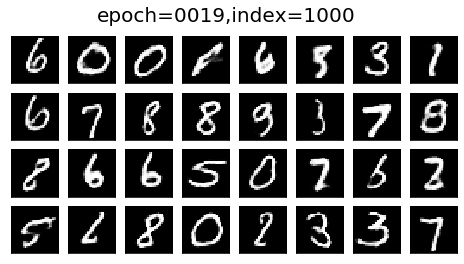

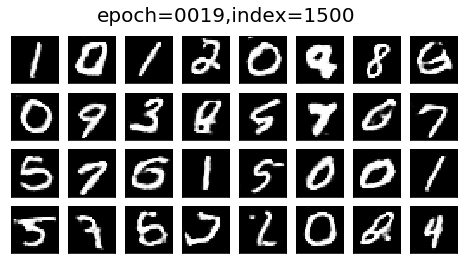

In [5]:
# 学習部分

import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.optimizers import Adam
from PIL import Image

BATCH_SIZE = 32
NUM_EPOCH = 20
GENERATED_IMAGE_PATH = 'generated_images/' # 生成画像の保存先

#loadした画像は0-1でクリップするのではなく、-1から1でクリップするのがGANでは一般的なようです。
#そのため、/255.0ではなく、127.5を引いてから/127.5します。
(X_train, y_train), (_, _) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
print(X_train.shape)

# discriminator
discriminator = discriminator_model()
d_opt = Adam(lr=1e-5, beta_1=0.1)
discriminator.compile(loss='binary_crossentropy', optimizer=d_opt)

# generator+discriminator （discriminator部分の重みは固定）
discriminator.trainable = False
generator = generator_model()
dcgan = Sequential([generator, discriminator])
g_opt = Adam(lr=2e-4, beta_1=0.5)
dcgan.compile(loss='binary_crossentropy', optimizer=g_opt)

# 1 epochの中のminibach数を定義
num_batches = int(X_train.shape[0] / BATCH_SIZE) # num_batches= 1875
print('Number of batches:', num_batches)
for epoch in range(NUM_EPOCH):

    # -1から1までの100次元の乱数をBATCH_SIZE(=32)個生成。これがGeneratorの入力になる。shape=(32,100)
    # データセットの方からも32枚の画像を抽出
    # generated_imagesがGeneratorによって生成された画像
    for index in range(num_batches):
        noise = np.array([np.random.uniform(-1, 1, 100) for _ in range(BATCH_SIZE)])
        image_batch = X_train[index*BATCH_SIZE:(index+1)*BATCH_SIZE]
        generated_images = generator.predict(noise, verbose=0)

        # 生成画像を出力
        if index % 500 == 0:

            # generate images and shape
            generated_images_plot = generated_images.astype('float32') * 127.5 + 127.5
            generated_images_plot = generated_images_plot.reshape((BATCH_SIZE, 28, 28))

            plt.figure(figsize=(8, 4))
            plt.suptitle('epoch=%04d,index=%04d' % (epoch, index), fontsize=20)
            for i in range(BATCH_SIZE):
                plt.subplot(4, 8, i + 1)
                plt.imshow(generated_images_plot[i])
                plt.gray()
                # eliminate ticks
                plt.xticks([]), plt.yticks([])


            # save images
            if not os.path.exists(GENERATED_IMAGE_PATH):
                os.mkdir(GENERATED_IMAGE_PATH)
            filename = GENERATED_IMAGE_PATH + "MNIST_%04d_%04d.png" % (epoch,index)
            plt.savefig(filename)
                
        # discriminatorを更新
        X = np.concatenate((image_batch, generated_images))
        y = [1]*BATCH_SIZE + [0]*BATCH_SIZE
        d_loss = discriminator.train_on_batch(X, y)

        # generatorを更新
        noise = np.array([np.random.uniform(-1, 1, 100) for _ in range(BATCH_SIZE)])
        g_loss = dcgan.train_on_batch(noise, [1]*BATCH_SIZE)
        print("epoch: %d, batch: %d, g_loss: %f, d_loss: %f" % (epoch, index, g_loss, d_loss))

    generator.save_weights('generator.h5')
    discriminator.save_weights('discriminator.h5')

train()

In [0]:
BATCH_SIZE = 32
y = [1]*BATCH_SIZE + [0]*BATCH_SIZE
y